# Module 4 : Reaction-Diffusion

##  Programme

Le but de ce programme est d'analyser le modèle de Gray-Scott. Celui-ci représente la réaction et la diffusion de deux espèces chimiques U et V, dont les concentrations en chaque point de l'espace et chaque instant du temps sont représentées par les variable u(x,y,t) et v(x,y,t) respectivement.
<br /> Ces deux concentrations obéissent au système d'équations différentielles suivant :
<br /> $$ \frac{\partial u}{\partial t} = D_u \nabla ^2 u - uv^2 + F(1-u)$$
<br /> $$ \frac{\partial v}{\partial t} = D_v \nabla ^2 v + uv^2 - (F+k)v$$
<br /> avec $D_u$ et $D_v$ les taux de diffusion, F et k sont des paramètres choisis du problème.  
<br />Rappel : $\nabla ^2 u= \frac{\partial ^2u}{\partial x ^2} + \frac{\partial ^2u}{\partial y ^2}$

Pour commencer, nous importons les librairies et commandes nécessaires à l'exécution de notre programme.

In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline


Nous importons un fichier contenant les conditions initiales de U et V :

In [3]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']
print U,V

[[ 1.03341932  1.00909902  1.03523907 ...,  1.01236     1.02769296
   1.01185515]
 [ 1.02049366  1.03874603  1.03186003 ...,  1.00917594  1.00648275
   1.01929723]
 [ 1.0297385   1.02874589  1.02488765 ...,  1.0345737   1.00195443
   1.03189674]
 ..., 
 [ 1.03851006  1.01833226  1.00260628 ...,  1.00514165  1.04292736
   1.0090857 ]
 [ 1.03951143  1.0425582   1.03609776 ...,  1.00643229  1.04094253
   1.03869138]
 [ 1.01132752  1.00554757  1.00241105 ...,  1.04435044  1.02683595
   1.01239924]] [[ 0.04286057  0.01747253  0.03235064 ...,  0.0283667   0.03892816
   0.0255146 ]
 [ 0.03567483  0.04898278  0.03607639 ...,  0.02100673  0.0305137
   0.00374435]
 [ 0.04936444  0.0423903   0.00414055 ...,  0.02084643  0.03015715
   0.03085144]
 ..., 
 [ 0.03707045  0.03856759  0.01737007 ...,  0.00421018  0.03256909
   0.00247397]
 [ 0.04781775  0.00190273  0.02729943 ...,  0.02507722  0.0468819
   0.00760259]
 [ 0.01798466  0.02495585  0.04354743 ...,  0.00184759  0.01039884
   0.01832535]]


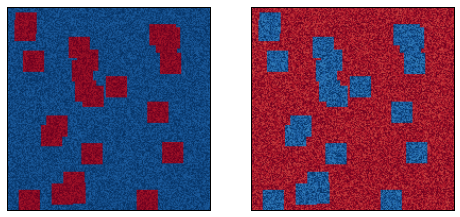

In [4]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

Ici, nous définissons les paramètres du problème :

In [5]:
n = 192
Du = 0.00016
Dv = 0.00008
F = 0.035
k = 0.065
dh = 5./(n-1)

Nous définissons ensuite les valeurs du pas de temps dt et de nt grâce aux deux fonctions suivantes, sachant que :

<br /> $ dt = \frac{9}{40} \frac{dh^2}{max(D_u,D_v)}$ et $nt = int(\frac{T}{dt})$

Ces fonctions nous permettrons d'effectuer l'évolution temporelle du système plus tard.



In [6]:
def dtcompute(dh):
    return 0.9*dh**2 / (4.*max(Du,Dv))

In [7]:
def ntcompute(T,dt):
    dt=dtcompute(dh)
    return int(T/dt)


## Méthode de Gray-Scott:

Implémentons maintenant la méthode de Gray-Scott. En utilisant les deux équations différentielles définies auparavant, nous allons utiliser la discrétisation "forward-time/center-space", ce qui nous donne les équations suivantes :
<br /> $$ \frac{u_{i,j} ^{N+1} - u_{i,j} ^N}{\Delta t} = D_u  (\frac{u_{i+1,j}^N-2u_{i,j}^N+u_{i-1,j}^N}{\Delta x^2} + \frac{u_{i,j+1}^N-2u_{i,j}^N + u_{i,j-1}^N}{\Delta y^2}) - u_{i,j}^N*(v_{i,j}^N)^2 + F(1-u_{i,j}^N)$$
<br /> $$ \frac{v_{i,j} ^{N+1} - v_{i,j} ^N}{\Delta t} = D_v  (\frac{v_{i+1,j}^N-2v_{i,j}^N+v_{i-1,j}^N}{\Delta x^2} + \frac{v_{i,j+1}^N-2v_{i,j}^N + v_{i,j-1}^N}{\Delta y^2}) + u_{i,j}^N*(v_{i,j}^N)^2 - (F+k)v_{i,j}^N$$

Isolons les termes connus à droite, et les termes inconnus à gauche avec l'hypothèse $\Delta x=\Delta y = \delta $ :
<br /> $$ u_{i,j} ^{N+1} = \Delta t (\frac {D_u}{\delta^2}  (u_{i+1,j}^N-4u_{i,j}^N+u_{i-1,j}^N + u_{i,j+1}^N + u_{i,j-1}^N) - u_{i,j}^N(v_{i,j}^N)^2 + F(1-u_{i,j}^N)) + u_{i,j} ^N $$
<br /> $$ v_{i,j} ^{N+1} =\Delta t (\frac {D_v}{\delta ^2}  (v_{i+1,j}^N-4v_{i,j}^N+v_{i-1,j}^N + v_{i,j+1}^N + v_{i,j-1}^N) + u_{i,j}^N(v_{i,j}^N)^2 - (F+k)v_{i,j}^N) + v_{i,j} ^N $$
<br /> 

De plus, il faut imposer les conditions de Neumann aux limites sur le domaine de dimensions 5m x 5m :

<br /> $\frac{\partial u}{\partial x} = 0$ et  $\frac{\partial u}{\partial y} = 0$ en x = 0 , x = 5 , y = 0 et y = 5

In [8]:
def grayscott(U,V,Du,Dv,F,k,dh,T):
    u = U.copy()
    v = V.copy()
    dt=dtcompute(dh)
    nt=ntcompute(T,dt)
    for i in range (1,nt) :
        Un=u.copy()
        Vn=v.copy()
        
        u[1:-1,1:-1]=dt * ((Du/dh**2) * (Un[2:,1:-1] - 4.*Un[1:-1,1:-1] + Un[:-2,1:-1] + Un[1:-1,2:] + Un[1:-1,:-2]) \
                     - Un[1:-1,1:-1] * (Vn[1:-1,1:-1])**2 + F * (1.-Un[1:-1,1:-1])) + Un[1:-1,1:-1]
        
        v[1:-1,1:-1]=dt * ((Dv/dh**2) * (Vn[2:,1:-1] - 4.*Vn[1:-1,1:-1] + Vn[:-2,1:-1] + Vn[1:-1,2:] + Vn[1:-1,:-2]) \
                     + Un[1:-1,1:-1] * (Vn[1:-1,1:-1])**2 - (F + k) * Vn[1:-1,1:-1]) + Vn[1:-1,1:-1]
                
        u[0,:]=u[1,:]        #conditions aux limites de Neumann   
        u[191,:]=u[190,:]
        u[:,0]= u[:,1]
        u[:,191]=u[:,190]
        v[0,:]=v[1,:]
        v[191,:]=v[190,:]
        v[:,0]= v[:,1]
        v[:,191]=v[:,190]
    grays=numpy.array([u,v])
    print u[100,::40]        #NUMERICAL INPUT
    return grays

Nous pouvons maintenant définir une fonction "map" qui va calculer la solution et l'afficher au temps T = 8000s, c'est-à-dire au temps final. Et nous réutiliserons map pour resortir facilement les cartes d'autres paramètres.

In [9]:
def map(U,V,Du,Dv,F,k,T):
    s=grayscott(U,V,Du,Dv,F,k,dh,T)
    fig = pyplot.figure(figsize=(8,5))
    pyplot.subplot(121)
    pyplot.imshow(s[0], cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([]);
    pyplot.subplot(122)
    pyplot.imshow(s[1], cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([]);
    return 

[ 0.92468763  0.85016693  0.66816509  0.90198113  0.90395252]


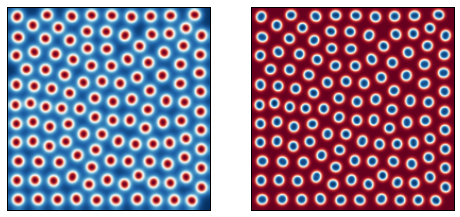

In [10]:
T=8000.
sol=map(U,V,Du,Dv,F,k,T)

# NUMERICAL INPUT:

*At time T=8000 (the last step of the simulation), enter the following code snippet
**<br />uans[100,::40]** CF--> fonction Grayscott 
<br />replacing uans with whatever the name of your u array is.
<br />Enter the five numbers of the resulting array below (round all results to 4 decimal places):*

valeurs sorties par la fonction arrondies à la 4ième décimale: <br /> **[ 0.9247   0.8501   0.6682   0.9020   0.9040]  **  

Ce sont bien les bonnes valeurs, notre définition de la discrètisation est donc correcte.

## Evolution temporelle

Nous allons tracer la solution à plusieurs temps afin d'observer l'évolution de la bactérie dans le domaine à travers le temps. Cette étude est possible grâce aux fonctions $ntcompute$ et $dtcompute$ définies plus tot. Elles nous permettent de faire évoluer la discrètisation et l'affichage du système au cours du temps juste en faisant varier la variable temporelle T.

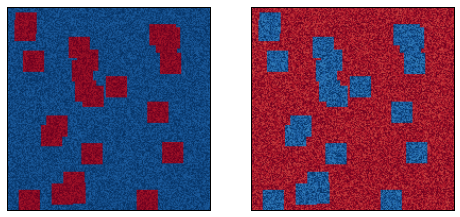

In [11]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

[ 1.00054644  0.70832315  0.91803835  0.99194919  0.97041853]


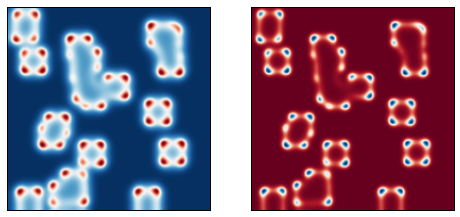

In [12]:
T=100.
sol=map(U,V,Du,Dv,F,k,T)

[ 0.99999855  0.50084701  0.96723423  0.98924279  0.97621927]


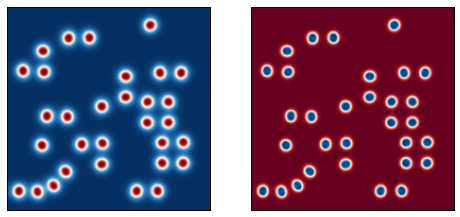

In [13]:
T=500.
sol=map(U,V,Du,Dv,F,k,T)

[ 0.99999791  0.55734993  0.9647923   0.9885439   0.97277652]


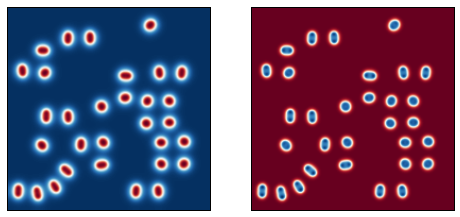

In [14]:
T=1000.
sol=map(U,V,Du,Dv,F,k,T)

[ 0.99999018  0.89667651  0.9608977   0.98534694  0.9498961 ]


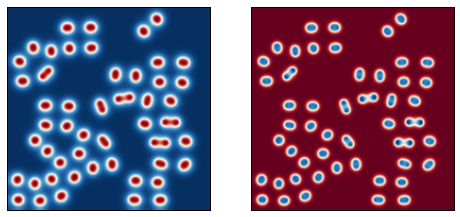

In [15]:
T=2000.
sol=map(U,V,Du,Dv,F,k,T)


[ 0.99942004  0.9207152   0.59636602  0.94932401  0.94168879]


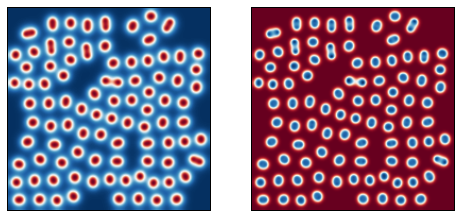

In [16]:
T=4000.
sol=map(U,V,Du,Dv,F,k,T)


[ 0.9727606   0.89250548  0.62901503  0.93250288  0.9319519 ]


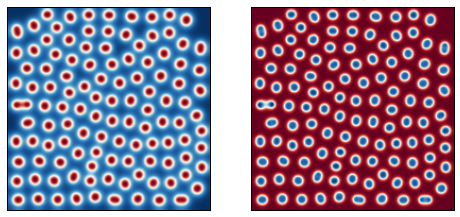

In [17]:
T=6000.
sol=map(U,V,Du,Dv,F,k,T)

[ 0.92145468  0.87219784  0.67945496  0.9184029   0.9105828 ]


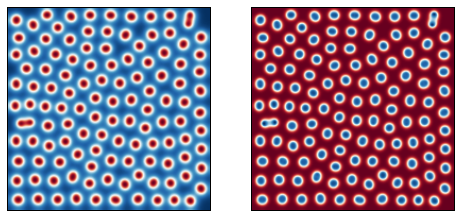

In [18]:
T=7000.
sol=map(U,V,Du,Dv,F,k,T)

[ 0.92468763  0.85016693  0.66816509  0.90198113  0.90395252]


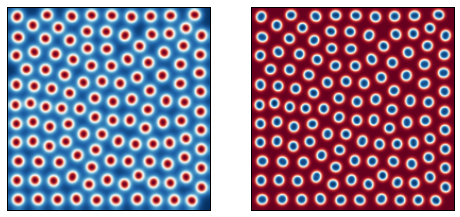

In [19]:
T=8000.
sol=map(U,V,Du,Dv,F,k,T)

Nous voyons bien que au cours du temps, la bactéries se répartie uniformément dans le domaine. Nous observons que les variations dans la réaction-diffusion sont plus importantes au début( nous voyons bien une différence évidente entre les cartes de T=100.s et T=500.s) et ralentissent vers le temps final, à partir de T=6000.s les différences entre les images sont moins remarquables pour de plus grands intervalles de temps puisque le système se rapproche de plus en plus vers un état homogène et stable.

## Exploring extra patterns

On va maintenant explorer différents modèles qui s'applique à la méthode de Gray-Scott:
<br /> Reprenons le temps final T = 8000s

In [21]:
T=8000.

[ 0.7192184   0.74499753  0.58900197  0.76391435  0.74611487]


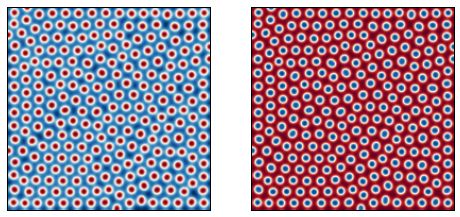

In [22]:
Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
sol2=map(U,V,Du,Dv,F,k,T)

[ 0.44592315  0.78544904  0.42847393  0.69711491  0.38771071]


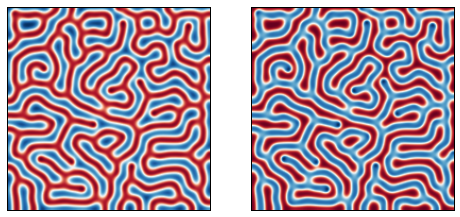

In [23]:
Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
sol3=map(U,V,Du,Dv,F,k,T)

[ 0.57273962  0.31453947  0.3656405   0.56866369  0.52804078]


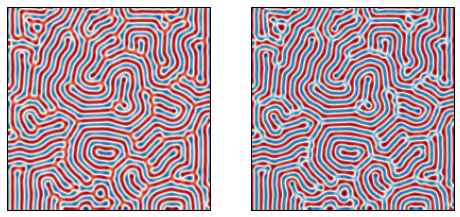

In [24]:
Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
sol4=map(U,V,Du,Dv,F,k,T)

[ 1.  1.  1.  1.  1.]


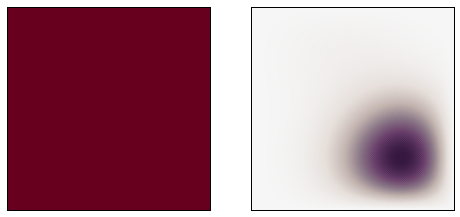

In [25]:
Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
sol5=map(U,V,Du,Dv,F,k,T)

[ 1.  1.  1.  1.  1.]


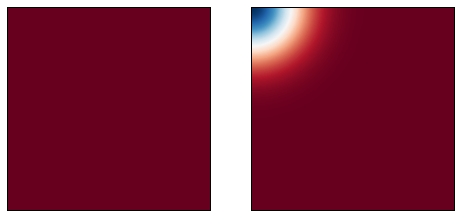

In [26]:
Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
sol6=map(U,V,Du,Dv,F,k,T)

[ 1.  1.  1.  1.  1.]


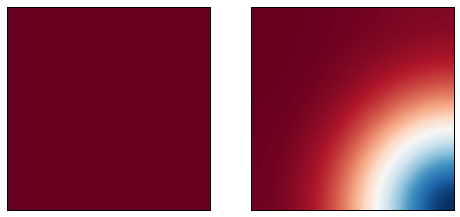

In [27]:
Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
sol7=map(U,V,Du,Dv,F,k,T)

[ 0.9807091   0.8280801   0.92527652  0.63963878  0.759161  ]


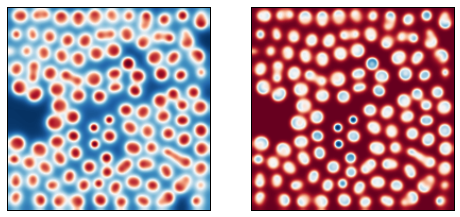

In [28]:
Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
sol8=map(U,V,Du,Dv,F,k,T)

[ 0.80042467  0.63597547  0.80552394  0.83888436  0.87117713]


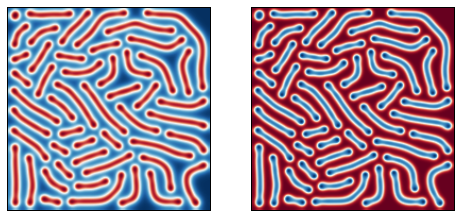

In [29]:
Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
sol9=map(U,V,Du,Dv,F,k,T)

[ 0.35473562  0.8144924   0.5668759   0.69436025  0.62588505]


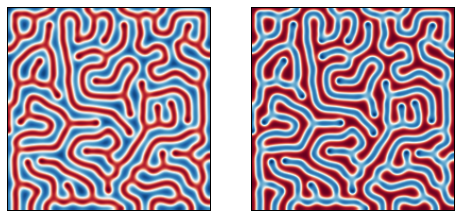

In [30]:
Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
sol10=map(U,V,Du,Dv,F,k,T)

[ 0.42775932  0.75032066  0.58449761  0.67660393  0.76306201]


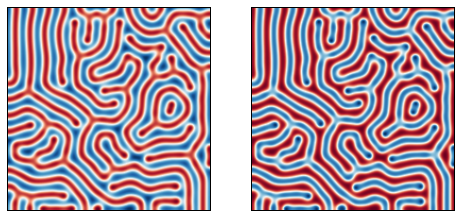

In [31]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish
sol11=map(U,V,Du,Dv,F,k,T)

## Analyse des patterns:

Le modèle Greys-Scott s'applique bien aux autres formes de diffusion sauf pour les spirales. En effet, celles-ci ne ressemblent pas à des spirales et n'ont pas l'air de tendre vers un système homogène et stable. Avec d'autres binômes, nous remarquons que nous avons tous le même problème. Après discussions et quelques recherches, nous avons trouvé des documents sur internet qui évoquent une "gamme limite de paramètre". La limite concerne les coefficients Du et Dv, ceux-ci doivent répondre à la condition $\frac {Du}{Dv}=2$ ( ou le rapport doit au moins d'être 2 si pas exactement).Et Effectivement nous voyons bien que cette condition est respectée pour tout les cas sauf pour les spirales.

Liens recherches: <br />http://mrob.com/sci/papers/munafo2009-0502.pdf
 http://mrob.com/sci/papers/munafo2009-0502.pdf
                  <br />http://www.sfu.ca/~pbastani/math495.pdf

Nous essayons donc de voir si nous obtenons une diffusion spirale correcte si nous adaptons les coefficients à cette condition:

[ 0.53012388  0.29806836  0.77669765  0.86875035  0.28411636]


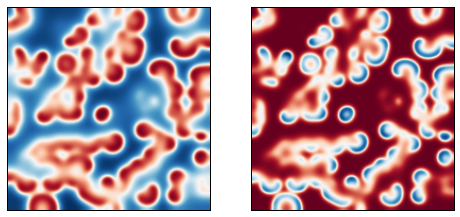

In [32]:
Du, Dv, F, k = 0.00020, 0.00010, 0.018, 0.050 # Spirals avec Du=0.00020 au lieu de 0.00010 qui est la valeur donnée dans l'énoncé
sol5=map(U,V,Du,Dv,F,k,T)

[ 0.67504309  0.34288916  0.88418097  0.69525198  0.37241624]


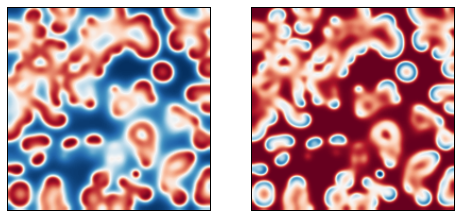

In [33]:
Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.050 # Spirals Dense avec Du=0.00016 au lieu de 0.00012 qui est la valeur donnée dans l'énoncé
sol6=map(U,V,Du,Dv,F,k,T)

[ 0.82368354  0.4280936   0.24572386  0.97748895  0.96773178]


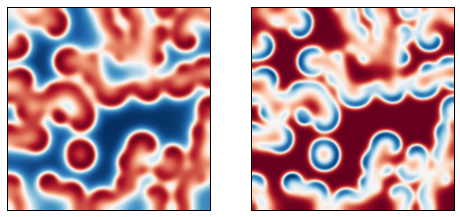

In [34]:
Du, Dv, F, k = 0.00032, 0.00016, 0.020, 0.050 # Spirals Fast avec Du=0.00032 au lieu de 0.00010 qui est la valeur donnée dans l'énoncé
sol7=map(U,V,Du,Dv,F,k,T)

Ces représentations nous paraissent bien plus cohérentes que celles données initialement ! La condition énoncée plus tôt est donc nécessaire à une bonne modèlisation de la réaction-diffusion d'un système à 2 composantes.

# Conclusion:

Le modèle de Gray-Scott fournis une bonne représentation des diffusions à 2 composantes en 2 dimensions. Nous nous serions arrêté là si nous avions juste répondu au problème demandé. Cependant, en voulant explorer des applications supplémentaires, nous avons trouvé des failles au modèle. La méthode Gray-Scott est donc un bon modèle sous condition que le rapport entre les taux de diffusion Du et Dv soit d'au moins 2. Le rapport doit sûrement avoir une valeur maximale puisque nous parlons d'une gamme limite de paramètre mais nous n'avons pas eu le temps ni l'occasion d'étudier plus précisément la question. A l'échelle de notre problème donné, Gray-Scott fourni une représentation correcte de la réaction-diffusion du système.